# Data Preprocessing & Initial Feature Engineering

## Introduction

This notebook presents the exploratory data analysis (EDA) and visualization component of a project that aims to predict whether a customer will recommend a product based on their review. The dataset contains customer feedback from an e-commerce clothing retailer. The insights gained from this analysis will guide the development of a binary classification model to predict product recommendations.

## Load libraries and Inspect Data

We begin by loading the dataset and performing an initial inspection to understand the structure, column names, and types of data we are dealing with.

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer


df = pd.read_csv("/Users/hoangnhu/Desktop/AI/Predictive-Analysis-Ecommerce/Data/Womens Clothing E-Commerce Reviews.csv")  # Ensure the file is in the same directory as the notebook

In [50]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Data Cleaning

This step includes removing duplicates, standardizing column names for ease of use, and stripping whitespace from text entrieg.

In [51]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.drop_duplicates(inplace=True)

In [52]:
df = df[(df['age'] > 0) & (df['age'] < 100)]
df = df[df['rating'].between(1, 5)]

### Handling Missing Values

We drop rows with missing values in essential columns such as 'review_text' and 'recommended_ind', which are critical for the prediction task. For less essential text fields like 'title', we impute missing values with empty strings to maintain consistency.

In [53]:
df = df.dropna(subset=['review_text', 'recommended_ind'])
df['title'] = df['title'].fillna('')

## Exploratory Data Analysis (EDA)

We conduct statistical analysis and visualizations to understand key characteristics of the data. This includes:

- Distribution of the target variable (`recommended_ind`)
- Relationship between age and recommendations
- Frequency of feedback across product categories
- Word clouds to visualize common themes in positive and negative reviews

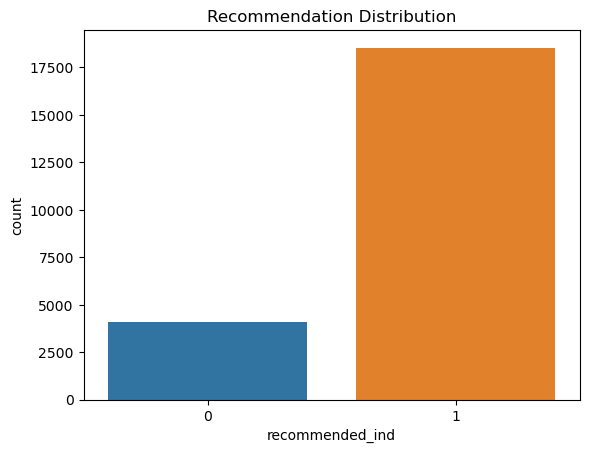

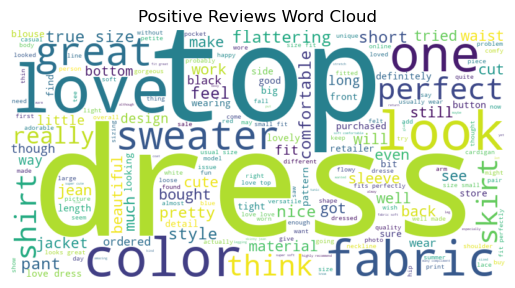

In [54]:
# recommendation distribution
sns.countplot(x='recommended_ind', data=df)
plt.title("Recommendation Distribution")
plt.show()

# wordcloud for positive reviews
from wordcloud import STOPWORDS

custom_stopwords = set(STOPWORDS)
# Add extra common words to remove
extra_stopwords = {'this', 'that', 'was', 'for', 'with', 'on', 'a', 'to', 'it', 'is', 'and', 'the', 'of', 'but', 'i', 'my', 'in', 'so', 'if', 'at', 'as', 'be', 'are', 'has', 'have', 'had'}
custom_stopwords = custom_stopwords.union(extra_stopwords)

# Get positive reviews and clean text by removing stopwords and short words (<3 chars)
positive_reviews = " ".join(df[df['recommended_ind'] == 1]['review_text'])
words = [word for word in positive_reviews.lower().split() if word not in custom_stopwords and len(word) >= 3]
cleaned_text = " ".join(words)

# Generate the word cloud with cleaned text
wc = WordCloud(stopwords=custom_stopwords, background_color='white', width=800, height=400).generate(cleaned_text)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()


The bar chart shows that the majority of customers—over 18,000—recommend the women’s clothing products, while around 4,000 customers do not. This indicates a strong overall satisfaction and positive shopping experience with the clothing items offered in this e-commerce platform.

The word cloud generated from positive reviews highlights frequently mentioned words such as “dress,” “love,” “fabric,” “fit,” “great,” “top,” and “skirt.” These terms suggest that customers appreciate the style, material quality, comfort, and fit of the women’s apparel. The focus on these keywords reveals what aspects contribute most to positive feedback in this clothing e-commerce context.

In summary, the analysis suggests that customers generally have a favorable impression of the women’s clothing products, often praising design, fabric, and fit. These insights can help the retailer better understand customer preferences and tailor marketing or product development to emphasize these valued qualities.

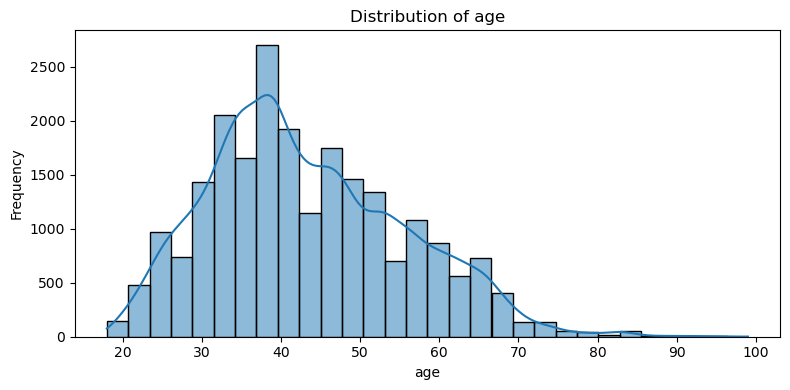

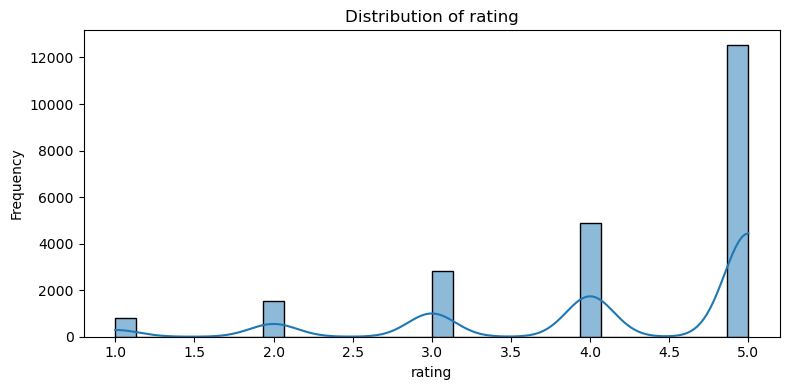

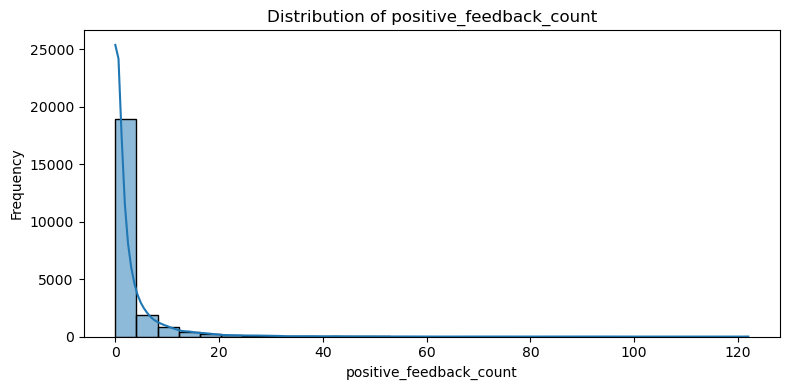

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['age', 'rating', 'positive_feedback_count']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


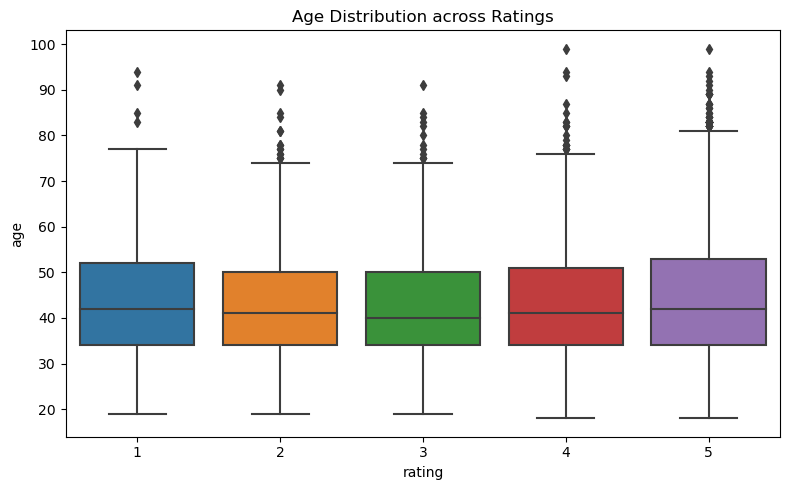

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='rating', y='age', data=df)
plt.title('Age Distribution across Ratings')
plt.tight_layout()
plt.show()


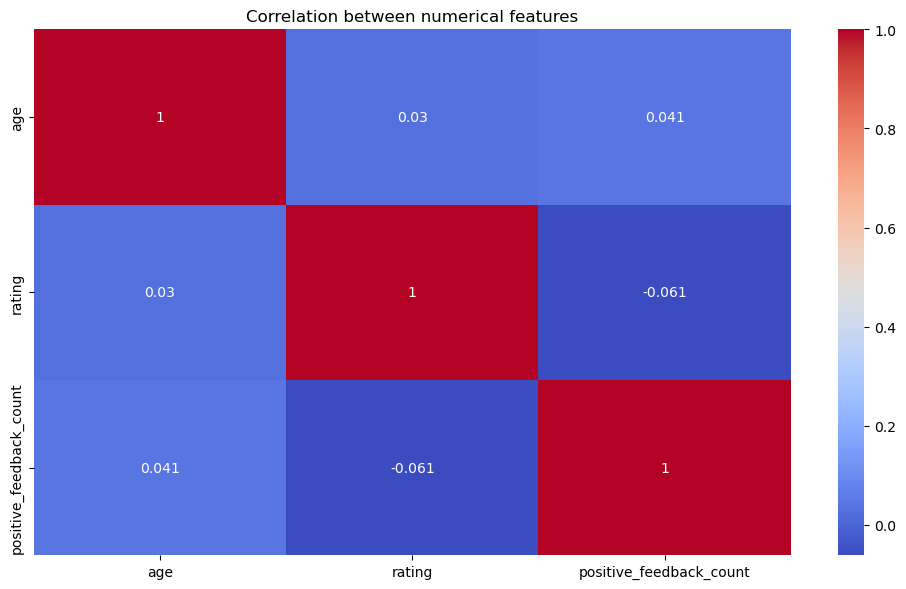

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between numerical features')
plt.tight_layout()
plt.show()


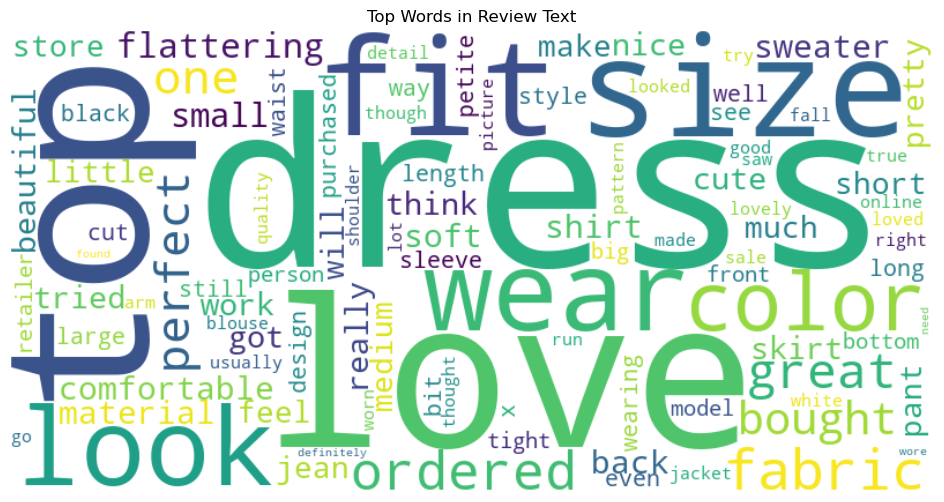

In [58]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# remove missing values
text_data = df['review_text'].dropna()

combined_text = " ".join(text_data)

# Tạo Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(combined_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words in Review Text")
plt.show()


### One-Hot Encoding for Categorical Variables

To use categorical features in machine learning models, we convert them into binary format using one-hot encoding. This step ensures that our model can interpret and learn from features such as 'division_name', 'department_name', and 'class_name'.

In [59]:
df = pd.get_dummies(df, columns=['division_name', 'department_name', 'class_name'], drop_first=True)

### TF-IDF Vectorization

We apply TF-IDF to the review text to convert unstructured text data into numerical form. This method helps highlight the most relevant words in customer feedback for the classification task.

In [60]:
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf.fit_transform(df['review_text'])

## Feature Engineering: Review Length

As an additional feature, we calculate the length of each review in terms of word count. This can reveal patterns in verbosity between positive and negative feedback, potentially aiding in model performance.

In [61]:
df['review_length'] = df['review_text'].apply(lambda x: len(x.split()))

In [62]:
# Save data for the next steps
df.to_csv('FE_reviews.csv', index=False)